In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test.shape

(10000, 28, 28, 1)

In [9]:
k = len(set(y_train))
print("the number of classes:", k)

the number of classes: 10


In [10]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5514 - accuracy: 0.7963 - val_loss: 0.4103 - val_accuracy: 0.8465
Epoch 2/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3784 - accuracy: 0.8581 - val_loss: 0.3427 - val_accuracy: 0.8748
Epoch 3/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3301 - accuracy: 0.8749 - val_loss: 0.3726 - val_accuracy: 0.8562
Epoch 4/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2977 - accuracy: 0.8890 - val_loss: 0.3142 - val_accuracy: 0.8850
Epoch 5/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2744 - accuracy: 0.8958 - val_loss: 0.3080 - val_accuracy: 0.8848
Epoch 6/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2564 - accuracy: 0.9026 - val_loss: 0.3105 - val_accuracy: 0.8857
Epoch 7/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2370 - accuracy: 0.9094 - val_loss: 0.2873 -

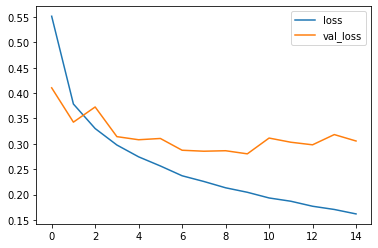

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

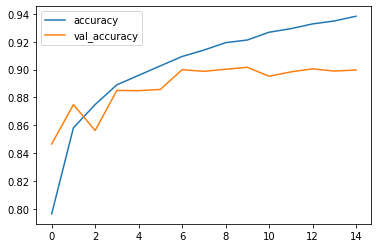

In [13]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[876   0  29  18   1   1  73   0   2   0]
 [  1 976   2  14   1   0   6   0   0   0]
 [ 17   0 861   8  65   0  47   0   2   0]
 [ 16   6  19 915  21   0  23   0   0   0]
 [  0   0  47  41 835   0  73   0   4   0]
 [  0   0   0   1   0 969   1  16   0  13]
 [124   2  78  24  95   0 669   0   8   0]
 [  0   0   0   0   0   9   0 948   0  43]
 [  4   1   5   3   3   1   7   2 973   1]
 [  1   0   0   0   0   5   0  19   0 975]]


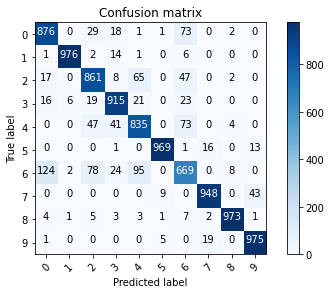

In [14]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [15]:
# label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

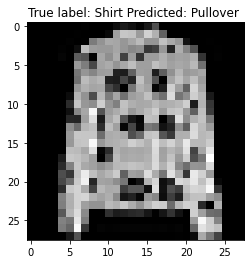

In [16]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

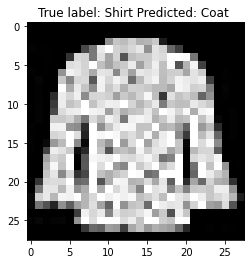

In [17]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

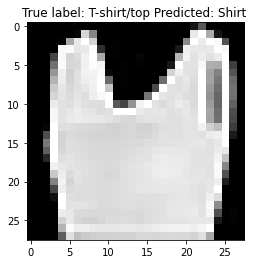

In [18]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));